# NFL Regression Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier #Decision Tree Classifier
from sklearn.model_selection import train_test_split # can split data into test test & train set
from sklearn import metrics # Can calculate how accurrate our model is
from sklearn import preprocessing #process data before creating model

In [2]:
df = pd.read_csv('nfl_games.csv')

In [3]:
df.head()

,date,season,neutral,playoff,team1,team2,elo1,elo2,elo_prob1,score1,score2,result1
0,9/26/1920,1920,0,0,RII,STP,1503.947,1300.000,0.824651,48,0,1.0
1,10/3/1920,1920,0,0,AKR,WHE,1503.420,1300.000,0.824212,43,0,1.0
2,10/3/1920,1920,0,0,RCH,ABU,1503.420,1300.000,0.824212,10,0,1.0
3,10/3/1920,1920,0,0,DAY,COL,1493.002,1504.908,0.575819,14,0,1.0
4,10/3/1920,1920,0,0,RII,MUN,1516.108,1478.004,0.644171,45,0,1.0


# Feature Engineering

I suspect that date will have no outcome on the result of the game, so I will plot the two against each other to see if there is a correlation. First I will need to convert date into a numerical format so that it can be graphed.

In [4]:
df["date"] = pd.to_datetime(df["date"]).dt.strftime("%Y%m%d").astype(int)

In [5]:
df.head()

,date,season,neutral,playoff,team1,team2,elo1,elo2,elo_prob1,score1,score2,result1
0,19200926,1920,0,0,RII,STP,1503.947,1300.000,0.824651,48,0,1.0
1,19201003,1920,0,0,AKR,WHE,1503.420,1300.000,0.824212,43,0,1.0
2,19201003,1920,0,0,RCH,ABU,1503.420,1300.000,0.824212,10,0,1.0
3,19201003,1920,0,0,DAY,COL,1493.002,1504.908,0.575819,14,0,1.0
4,19201003,1920,0,0,RII,MUN,1516.108,1478.004,0.644171,45,0,1.0


I have two plots below, I am plotting date against the score of team 1, and the date against the score of team 2. Because my data set is so large, using the entire set leads to a cluttered graph. For this reason I am only using a random sample of 1000 values (found by calling df.sample(1000) before the plot command. 

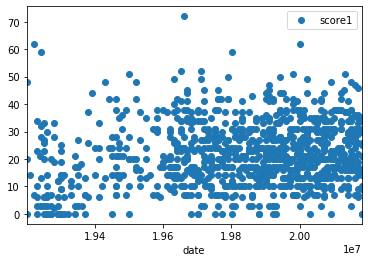

In [6]:
df.sample(1000).plot(x='date', y='score1', style='o')

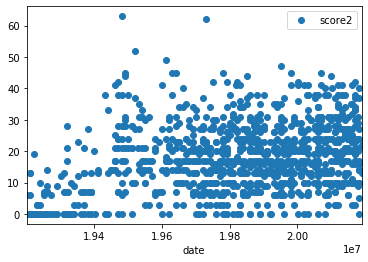

In [7]:
df.sample(1000).plot(x='date', y='score2', style='o')

I can see from these plots that there is no correlation between the date of a game and the score of either team, so I will drop these columns from my data set.

In [8]:
df = df.drop(columns=['date'])
df.head()

,season,neutral,playoff,team1,team2,elo1,elo2,elo_prob1,score1,score2,result1
0,1920,0,0,RII,STP,1503.947,1300.000,0.824651,48,0,1.0
1,1920,0,0,AKR,WHE,1503.420,1300.000,0.824212,43,0,1.0
2,1920,0,0,RCH,ABU,1503.420,1300.000,0.824212,10,0,1.0
3,1920,0,0,DAY,COL,1493.002,1504.908,0.575819,14,0,1.0
4,1920,0,0,RII,MUN,1516.108,1478.004,0.644171,45,0,1.0


I know that I can also delete the result's column, for 2 reasons: 
1- I already know the result based on the scores given.
2- I am attempting to predict the scores of games, not their result.

In [9]:
df = df.drop(columns=['result1'])
df.head()

,season,neutral,playoff,team1,team2,elo1,elo2,elo_prob1,score1,score2
0,1920,0,0,RII,STP,1503.947,1300.000,0.824651,48,0
1,1920,0,0,AKR,WHE,1503.420,1300.000,0.824212,43,0
2,1920,0,0,RCH,ABU,1503.420,1300.000,0.824212,10,0
3,1920,0,0,DAY,COL,1493.002,1504.908,0.575819,14,0
4,1920,0,0,RII,MUN,1516.108,1478.004,0.644171,45,0


# Label Encoding

I am now going to use label encoding for my team names. Because team1 and team2 come from the same list of teams, I will need to label encode them together so the same team has the same value in both the team1 column and the team2 column.

In [10]:
label_encoder = preprocessing.LabelEncoder() #label encoder object
label_encoder.fit(df['team1'].append(df['team2'])) #label encode team1 and team2 columns together
df['team1'] = label_encoder.transform(df['team1']) #use LE to transorm data in original data set
df['team2'] = label_encoder.transform(df['team2'])
df.head()

,season,neutral,playoff,team1,team2,elo1,elo2,elo_prob1,score1,score2
0,1920,0,0,98,106,1503.947,1300.000,0.824651,48,0
1,1920,0,0,1,119,1503.420,1300.000,0.824212,43,0
2,1920,0,0,94,0,1503.420,1300.000,0.824212,10,0
3,1920,0,0,34,27,1493.002,1504.908,0.575819,14,0
4,1920,0,0,98,75,1516.108,1478.004,0.644171,45,0


# Regression Model

I am now going to put my data into a random forest regressor in order to predict future scores.

In [11]:
X = df[['season', 'neutral', 'playoff', 'team1', 'team2', 'elo1', 'elo2', 'elo_prob1']]
Y = df[['score1', 'score2']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

from sklearn.ensemble import RandomForestRegressor

# create a regressor object 
regressor = RandomForestRegressor(n_estimators = 200)  
  
# fit the regressor with X and Y data 
regressor.fit(X_train, Y_train)

#print("R-Squared on test dataset={}".format(regressor.score(X_test,Y_test))
prediction = metrics.r2_score(Y_test, regressor.predict(X_test))
print(prediction)

0.12445130779843316


I can see that I am obtaining roughly ~14% accuracy. I will now try out my regression models with less estimators to see if I can increase efficiency while retaining accuracy.

In [12]:
regressor = RandomForestRegressor(n_estimators = 100) 
regressor.fit(X_train, Y_train)
prediction = metrics.r2_score(Y_test, regressor.predict(X_test))
print(prediction)

0.11788129030259348


I see that despite cutting my estimators down by 50% (from 200 to 100), increasing efficiency, my regresssion model has essentially retained its initial accuracy. 

In [13]:
regressor = RandomForestRegressor(n_estimators = 50) 
regressor.fit(X_train, Y_train)
prediction = metrics.r2_score(Y_test, regressor.predict(X_test))
print(prediction)

0.10834761517948283


When I reduce my number of estimators to 50 I begin to see a decline in accuracy.

I can see that cutting my estimators in half leaves me with roughly the same prediction accuracy as I had with 200. When I cut them down again to only 50 estimators I begin to lose accuracy. For this reason I would use 100 estimators to maximize efficiency and keep accuracy high. With 100 estimators my regression model can predict scores of NFL teams with roughly 14% accuracy. In order to increase this number it would be helpful to have a larger data set.